In [34]:
# Import pandas
import pandas as pd

# Import yfinance
import yfinance as yf

# Import numpy
import numpy as np

# Import plot lib
import matplotlib.pyplot as plt

# Import evaluate library
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, mean_absolute_error

# Import the required libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [35]:
# 'BTC-USD': 'Bitcoin USD',
# 'ETH-USD': 'Ethereum USD',
# 'SOL-USD': 'Solana USD'

crypto = "BTC-USD"
crypto_data = yf.Ticker(crypto)
info = crypto_data.info
for key,value in info.items():
    print(key,' : ',value)

name  :  Bitcoin
startDate  :  1278979200
description  :  Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,796,178. The last known price of Bitcoin is 102,158.05922381 USD and is up 0.53 over the last 24 hours. It is currently trading on 11840 active market(s) with $38,778,167,638.77 traded over the last 24 hours. More information can be found at https://bitcoin.org/.
maxAge  :  86400
priceHint  :  2
previousClose  :  104447.664
open  :  104447.664
dayLow  :  104373.32
dayHigh  :  106449.88
regularMarketPreviousClose  :  104447.664
regularMarketOpen  :  104447.664
regularMarketDayLow  :  104373.32
regularMarketDayHigh  :  106449.88
volume  :  63453540352
regularMarketVolume  :  63453540352
averageVolume  :  50780451201
averageVolume10days  :  80234034944
averageDailyVolume10Day  :  80234034944
marketCap  :  2068718551040
fiftyTwoWeekLow  :  38521.895
fiftyTwoWeekHigh  :  106449.88
fiftyD

In [36]:
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

# Period must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

interval = "1h"
period = "3mo"

In [37]:
crypto_data_hist = crypto_data.history(interval=interval,period=period)
print(crypto_data_hist)

                                    Open           High            Low  \
Datetime                                                                 
2024-09-16 04:00:00+00:00   58569.511719   58569.511719   58333.832031   
2024-09-16 05:00:00+00:00   58347.183594   58647.984375   58347.183594   
2024-09-16 06:00:00+00:00   58667.917969   58835.953125   58634.835938   
2024-09-16 07:00:00+00:00   58699.898438   58952.566406   58674.695312   
2024-09-16 08:00:00+00:00   58903.507812   59154.617188   58852.777344   
...                                  ...            ...            ...   
2024-12-16 00:00:00+00:00  104447.664062  106408.882812  104313.398438   
2024-12-16 01:00:00+00:00  105405.132812  105467.164062  104938.132812   
2024-12-16 02:00:00+00:00  105482.375000  105487.273438  104466.546875   
2024-12-16 03:00:00+00:00  104525.531250  104950.875000  104311.125000   
2024-12-16 04:00:00+00:00  104537.898438  104537.898438  104453.632812   

                                   Cl

In [38]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                   Close
Datetime                                
2024-09-16 04:00:00+00:00   58333.832031
2024-09-16 05:00:00+00:00   58647.984375
2024-09-16 06:00:00+00:00   58696.980469
2024-09-16 07:00:00+00:00   58906.949219
2024-09-16 08:00:00+00:00   58909.468750
...                                  ...
2024-12-16 00:00:00+00:00  105334.125000
2024-12-16 01:00:00+00:00  105451.382812
2024-12-16 02:00:00+00:00  104547.007812
2024-12-16 03:00:00+00:00  104537.187500
2024-12-16 04:00:00+00:00  104498.140625

[2185 rows x 1 columns]


In [39]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                   Close
Datetime                                
2024-09-16 04:00:00+00:00   58333.832031
2024-09-16 05:00:00+00:00   58647.984375
2024-09-16 06:00:00+00:00   58696.980469
2024-09-16 07:00:00+00:00   58906.949219
2024-09-16 08:00:00+00:00   58909.468750
...                                  ...
2024-12-16 00:00:00+00:00  105334.125000
2024-12-16 01:00:00+00:00  105451.382812
2024-12-16 02:00:00+00:00  104547.007812
2024-12-16 03:00:00+00:00  104537.187500
2024-12-16 04:00:00+00:00  104498.140625

[2185 rows x 1 columns]


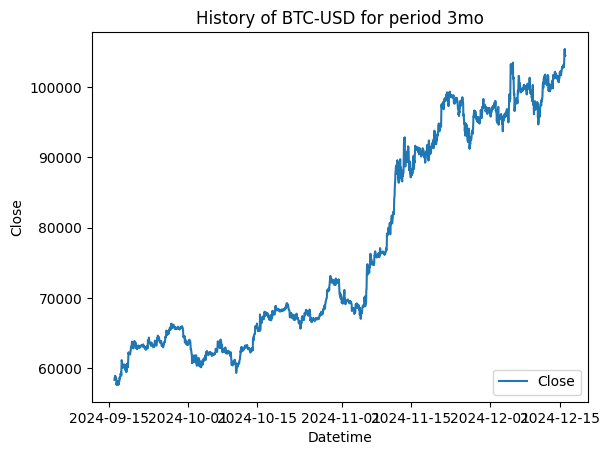

In [40]:
plt.title(f"History of {crypto} for period {period}")
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(crypto_data_hist['Close'])

plt.legend(['Close'], loc='lower right')

plt.show()

In [41]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                   Close
Datetime                                
2024-09-16 04:00:00+00:00   58333.832031
2024-09-16 05:00:00+00:00   58647.984375
2024-09-16 06:00:00+00:00   58696.980469
2024-09-16 07:00:00+00:00   58906.949219
2024-09-16 08:00:00+00:00   58909.468750
...                                  ...
2024-12-16 00:00:00+00:00  105334.125000
2024-12-16 01:00:00+00:00  105451.382812
2024-12-16 02:00:00+00:00  104547.007812
2024-12-16 03:00:00+00:00  104537.187500
2024-12-16 04:00:00+00:00  104498.140625

[2185 rows x 1 columns]


In [42]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                   Close
Datetime                                
2024-09-16 04:00:00+00:00   58333.832031
2024-09-16 05:00:00+00:00   58647.984375
2024-09-16 06:00:00+00:00   58696.980469
2024-09-16 07:00:00+00:00   58906.949219
2024-09-16 08:00:00+00:00   58909.468750
...                                  ...
2024-12-16 00:00:00+00:00  105334.125000
2024-12-16 01:00:00+00:00  105451.382812
2024-12-16 02:00:00+00:00  104547.007812
2024-12-16 03:00:00+00:00  104537.187500
2024-12-16 04:00:00+00:00  104498.140625

[2185 rows x 1 columns]


In [43]:
# Scale into range 0..1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data_close)
print(scaled_data)

[[0.01513835]
 [0.02170484]
 [0.02272897]
 ...
 [0.98109655]
 [0.98089128]
 [0.98007512]]


In [44]:
# Define train size
split = 0.8
train_size = int(len(scaled_data) * split)
print(train_size)

1748


In [45]:
# Define training and testing area before scaled
train_data = crypto_data_close[:train_size]
test_data = crypto_data_close[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
                                  Close
Datetime                               
2024-09-16 04:00:00+00:00  58333.832031
2024-09-16 05:00:00+00:00  58647.984375
2024-09-16 06:00:00+00:00  58696.980469
2024-09-16 07:00:00+00:00  58906.949219
2024-09-16 08:00:00+00:00  58909.468750
...                                 ...
2024-11-27 19:00:00+00:00  96689.257812
2024-11-27 20:00:00+00:00  96485.070312
2024-11-27 21:00:00+00:00  96270.609375
2024-11-27 22:00:00+00:00  96220.804688
2024-11-27 23:00:00+00:00  95981.171875

[1748 rows x 1 columns]
Data Testing
                                   Close
Datetime                                
2024-11-28 00:00:00+00:00   96560.406250
2024-11-28 01:00:00+00:00   96336.296875
2024-11-28 02:00:00+00:00   95767.843750
2024-11-28 03:00:00+00:00   95614.296875
2024-11-28 04:00:00+00:00   95804.226562
...                                  ...
2024-12-16 00:00:00+00:00  105334.125000
2024-12-16 01:00:00+00:00  105451.382812
2024-12-16 02:00:0

In [46]:
# Define training and testing area after scaled
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
[[0.01513835]
 [0.02170484]
 [0.02272897]
 ...
 [0.80810141]
 [0.80706038]
 [0.80205152]]
Data Testing
[[0.81415881]
 [0.80947442]
 [0.79759249]
 [0.79438302]
 [0.79835297]
 [0.79250704]
 [0.79310863]
 [0.78763062]
 [0.79123756]
 [0.78441739]
 [0.78291096]
 [0.79330949]
 [0.79321576]
 [0.79770288]
 [0.79226291]
 [0.78187875]
 [0.78064193]
 [0.77961364]
 [0.7877869 ]
 [0.78384634]
 [0.77774811]
 [0.78375734]
 [0.79410982]
 [0.79522907]
 [0.79251586]
 [0.8015533 ]
 [0.81837093]
 [0.81479077]
 [0.8086305 ]
 [0.80678179]
 [0.80778641]
 [0.79439445]
 [0.80225597]
 [0.81045226]
 [0.8202407 ]
 [0.82937301]
 [0.82342421]
 [0.82830782]
 [0.84496183]
 [0.85108145]
 [0.84225679]
 [0.82665883]
 [0.82850476]
 [0.83218044]
 [0.83227402]
 [0.83227059]
 [0.83047887]
 [0.83261433]
 [0.82472113]
 [0.81411406]
 [0.81590986]
 [0.81628234]
 [0.81739114]
 [0.82676677]
 [0.81641641]
 [0.81948169]
 [0.82290002]
 [0.81921404]
 [0.80649357]
 [0.80867802]
 [0.81440653]
 [0.81295758]
 [0.81301784]
 

In [47]:
# lookback = 5
# [30, 31, 94, 50, 27, 68, 37, 69, 27, 57, 25, 48, 50]
# train data  =   [30, 31, 94, 50, 27] => 68
#                 [31, 94, 50, 27, 68] => 37
#                 [94, 50, 27, 68, 37] => 69
#                 ...
#                 [69, 27, 57, 25, 48] => 50
# x train data = ([30, 31, 94, 50, 27], [31, 94, 50, 27, 68], [94, 50, 27, 68, 37], ..., [69, 27, 57, 25, 48])
# y train data = (68, 37, 69, 27, 57, 25, 48, 50)
lookback = int(24/2)
x_data = []
y_data = []
for i in range(lookback,len(scaled_data)):
    x_data.append(scaled_data[i-lookback:i,0])
    y_data.append(scaled_data[i,0])

# Converting the x and y values to numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

# Reshaping x and y data to make the calculations easier
x_data = np.reshape(x_data, (x_data.shape[0],x_data.shape[1],1))
y_data = np.reshape(y_data, (y_data.shape[0],1))
print(f"X Data : {x_data.shape}")
print(x_data)
print(f"Y Data : {y_data.shape}")
print(y_data)

X Data : (2173, 12, 1)
[[[0.01513835]
  [0.02170484]
  [0.02272897]
  ...
  [0.01724417]
  [0.        ]
  [0.00637183]]

 [[0.02170484]
  [0.02272897]
  [0.02711778]
  ...
  [0.        ]
  [0.00637183]
  [0.00497906]]

 [[0.02272897]
  [0.02711778]
  [0.02717044]
  ...
  [0.00637183]
  [0.00497906]
  [0.01196669]]

 ...

 [[0.94707753]
  [0.94327446]
  [0.94860306]
  ...
  [0.97500486]
  [0.99754905]
  [1.        ]]

 [[0.94327446]
  [0.94860306]
  [0.95101907]
  ...
  [0.99754905]
  [1.        ]
  [0.98109655]]

 [[0.94860306]
  [0.95101907]
  [0.95173186]
  ...
  [1.        ]
  [0.98109655]
  [0.98089128]]]
Y Data : (2173, 1)
[[0.00497906]
 [0.01196669]
 [0.00414289]
 ...
 [0.98109655]
 [0.98089128]
 [0.98007512]]


In [48]:
xy_train_size = int(x_data.shape[0]*split)
print(xy_train_size)

1738


In [49]:
x_train_data = x_data[:xy_train_size,:,:]
y_train_data = y_data[:xy_train_size,:]
print("X Train Data")
print(x_train_data)
print("Y Train Data")
print(y_train_data)

X Train Data
[[[0.01513835]
  [0.02170484]
  [0.02272897]
  ...
  [0.01724417]
  [0.        ]
  [0.00637183]]

 [[0.02170484]
  [0.02272897]
  [0.02711778]
  ...
  [0.        ]
  [0.00637183]
  [0.00497906]]

 [[0.02272897]
  [0.02711778]
  [0.02717044]
  ...
  [0.00637183]
  [0.00497906]
  [0.01196669]]

 ...

 [[0.74726205]
  [0.74934868]
  [0.76335693]
  ...
  [0.81258412]
  [0.80810141]
  [0.80706038]]

 [[0.74934868]
  [0.76335693]
  [0.78002319]
  ...
  [0.80810141]
  [0.80706038]
  [0.80205152]]

 [[0.76335693]
  [0.78002319]
  [0.79894836]
  ...
  [0.80706038]
  [0.80205152]
  [0.81415881]]]
Y Train Data
[[0.00497906]
 [0.01196669]
 [0.00414289]
 ...
 [0.80205152]
 [0.81415881]
 [0.80947442]]


In [50]:

x_test_data = x_data[xy_train_size:,:,:]
y_test_data = y_data[xy_train_size:,:]
print("X Test Data")
print(x_test_data)
print("Y Test Data")
print(y_test_data)

X Test Data
[[[0.78002319]
  [0.79894836]
  [0.79770451]
  ...
  [0.80205152]
  [0.81415881]
  [0.80947442]]

 [[0.79894836]
  [0.79770451]
  [0.80904527]
  ...
  [0.81415881]
  [0.80947442]
  [0.79759249]]

 [[0.79770451]
  [0.80904527]
  [0.80746732]
  ...
  [0.80947442]
  [0.79759249]
  [0.79438302]]

 ...

 [[0.94707753]
  [0.94327446]
  [0.94860306]
  ...
  [0.97500486]
  [0.99754905]
  [1.        ]]

 [[0.94327446]
  [0.94860306]
  [0.95101907]
  ...
  [0.99754905]
  [1.        ]
  [0.98109655]]

 [[0.94860306]
  [0.95101907]
  [0.95173186]
  ...
  [1.        ]
  [0.98109655]
  [0.98089128]]]
Y Test Data
[[0.79759249]
 [0.79438302]
 [0.79835297]
 [0.79250704]
 [0.79310863]
 [0.78763062]
 [0.79123756]
 [0.78441739]
 [0.78291096]
 [0.79330949]
 [0.79321576]
 [0.79770288]
 [0.79226291]
 [0.78187875]
 [0.78064193]
 [0.77961364]
 [0.7877869 ]
 [0.78384634]
 [0.77774811]
 [0.78375734]
 [0.79410982]
 [0.79522907]
 [0.79251586]
 [0.8015533 ]
 [0.81837093]
 [0.81479077]
 [0.8086305 ]
 [0.

In [51]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train_data.shape[1],x_train_data.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.summary()

epoch = 200

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data, y_train_data, epochs=epoch, batch_size=32)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 174s 598ms/step - loss: 0.0368
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.3527e-04
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 3.1146e-04
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 2.8126e-04
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1270e-04
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.2826e-04
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.8346e-04
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 2.6325e-04
Epoch 9/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 3.0015e-04
Epoch 10/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.7666e-04
Epoch 11/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.8693e-04
Epoch 12/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2288e-04
Epoch 13/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.9655e-04
Epoch 14/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.8106e-04
Ep

In [52]:
# Save the model to a file
model.save('rnnbtc1h.keras')

In [53]:
# Predict data for test data
predictions = model.predict(x_test_data)
predictions = scaler.inverse_transform(predictions)
print(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step
[[ 96095.34 ]
 [ 95469.15 ]
 [ 95373.516]
 [ 95631.195]
 [ 95315.66 ]
 [ 95359.43 ]
 [ 95080.914]
 [ 95289.125]
 [ 94927.945]
 [ 94867.805]
 [ 95428.75 ]
 [ 95376.38 ]
 [ 95576.27 ]
 [ 95268.38 ]
 [ 94743.5  ]
 [ 94743.25 ]
 [ 94726.79 ]
 [ 95159.12 ]
 [ 94916.8  ]
 [ 94591.45 ]
 [ 94938.13 ]
 [ 95466.734]
 [ 95459.31 ]
 [ 95280.65 ]
 [ 95759.375]
 [ 96603.39 ]
 [ 96312.234]
 [ 95968.01 ]
 [ 95920.71 ]
 [ 96010.58 ]
 [ 95320.11 ]
 [ 95798.89 ]
 [ 96226.414]
 [ 96675.31 ]
 [ 97075.49 ]
 [ 96689.23 ]
 [ 96957.69 ]
 [ 97824.72 ]
 [ 98045.87 ]
 [ 97508.445]
 [ 96736.   ]
 [ 96959.8  ]
 [ 97195.39 ]
 [ 97179.37 ]
 [ 97167.28 ]
 [ 97071.695]
 [ 97193.41 ]
 [ 96772.195]
 [ 96255.234]
 [ 96425.6  ]
 [ 96460.37 ]
 [ 96506.24 ]
 [ 96983.16 ]
 [ 96382.39 ]
 [ 96570.93 ]
 [ 96758.555]
 [ 96539.59 ]
 [ 95882.76 ]
 [ 96072.98 ]
 [ 96395.34 ]
 [ 96283.1  ]
 [ 96273.31 ]
 [ 96514.17 ]
 [ 96759.55 ]
 [ 96554.31 ]
 [ 96792.65 ]
 [ 96809.62 ]
 [ 96745.25 ]
 [ 9656

In [54]:
y_test = y_test_data.reshape(y_test_data.shape[0],1)
y_test = scaler.inverse_transform(y_test)
print(y_test)

[[ 95767.84375  ]
 [ 95614.296875 ]
 [ 95804.2265625]
 [ 95524.546875 ]
 [ 95553.328125 ]
 [ 95291.25     ]
 [ 95463.8125   ]
 [ 95137.5234375]
 [ 95065.453125 ]
 [ 95562.9375   ]
 [ 95558.453125 ]
 [ 95773.125    ]
 [ 95512.8671875]
 [ 95016.0703125]
 [ 94956.8984375]
 [ 94907.703125 ]
 [ 95298.7265625]
 [ 95110.203125 ]
 [ 94818.453125 ]
 [ 95105.9453125]
 [ 95601.2265625]
 [ 95654.7734375]
 [ 95524.96875  ]
 [ 95957.3359375]
 [ 96761.921875 ]
 [ 96590.640625 ]
 [ 96295.921875 ]
 [ 96207.4765625]
 [ 96255.5390625]
 [ 95614.84375  ]
 [ 95990.953125 ]
 [ 96383.078125 ]
 [ 96851.375    ]
 [ 97288.28125  ]
 [ 97003.6796875]
 [ 97237.3203125]
 [ 98034.078125 ]
 [ 98326.8515625]
 [ 97904.6640625]
 [ 97158.4296875]
 [ 97246.7421875]
 [ 97422.59375  ]
 [ 97427.0703125]
 [ 97426.90625  ]
 [ 97341.1875   ]
 [ 97443.3515625]
 [ 97065.7265625]
 [ 96558.265625 ]
 [ 96644.1796875]
 [ 96662.       ]
 [ 96715.046875 ]
 [ 97163.59375  ]
 [ 96668.4140625]
 [ 96815.0625   ]
 [ 96978.6015625]
 [ 96802.2

In [55]:
# Difference of y_test and predictions
print("Difference of actual and prediction")
print(predictions-y_test)

Difference of actual and prediction
[[ 3.27500000e+02]
 [-1.45148438e+02]
 [-4.30710938e+02]
 [ 1.06648438e+02]
 [-2.37671875e+02]
 [ 6.81796875e+01]
 [-3.82898438e+02]
 [ 1.51601562e+02]
 [-1.37507812e+02]
 [-6.95132812e+02]
 [-1.29703125e+02]
 [-3.96742187e+02]
 [ 6.34062500e+01]
 [ 2.52312500e+02]
 [-2.13398438e+02]
 [-1.64453125e+02]
 [-5.71937500e+02]
 [ 4.89140625e+01]
 [ 9.83437500e+01]
 [-5.14492188e+02]
 [-6.63093750e+02]
 [-1.88039062e+02]
 [-6.56562500e+01]
 [-6.76687500e+02]
 [-1.00254688e+03]
 [ 1.27500000e+01]
 [ 1.63125000e+01]
 [-2.39468750e+02]
 [-3.34828125e+02]
 [ 3.95734375e+02]
 [-6.70843750e+02]
 [-5.84187500e+02]
 [-6.24960938e+02]
 [-6.12968750e+02]
 [ 7.18125000e+01]
 [-5.48093750e+02]
 [-1.07639062e+03]
 [-5.02132812e+02]
 [ 1.41203125e+02]
 [ 3.50015625e+02]
 [-5.10742188e+02]
 [-4.62796875e+02]
 [-2.31679687e+02]
 [-2.47539062e+02]
 [-1.73906250e+02]
 [-3.71656250e+02]
 [ 1.27679687e+02]
 [ 2.13929688e+02]
 [-3.88945312e+02]
 [-2.36398438e+02]
 [-2.54679688e

In [56]:
# Evaluation
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(f"Mean Squared Error              : {mse}")
print(f"Mean Absolute Error             : {mae}")
print(f"Root Mean Squared Error         : {rmse}")
print(f"Mean Absolute Percentage Error  : {mape}")

Mean Squared Error              : 423198.23882299045
Mean Absolute Error             : 499.925592672414
Root Mean Squared Error         : 650.5368850595563
Mean Absolute Percentage Error  : 0.005051103706871361


In [57]:
predict = pd.DataFrame(predictions,index=crypto_data_close.index[xy_train_size+lookback:],columns=["Close"])
print(predict)

                                   Close
Datetime                                
2024-11-28 02:00:00+00:00   96095.343750
2024-11-28 03:00:00+00:00   95469.148438
2024-11-28 04:00:00+00:00   95373.515625
2024-11-28 05:00:00+00:00   95631.195312
2024-11-28 06:00:00+00:00   95315.656250
...                                  ...
2024-12-16 00:00:00+00:00  103865.851562
2024-12-16 01:00:00+00:00  104866.601562
2024-12-16 02:00:00+00:00  104752.820312
2024-12-16 03:00:00+00:00  103687.523438
2024-12-16 04:00:00+00:00  103875.140625

[435 rows x 1 columns]


In [58]:
train = crypto_data_close[:xy_train_size+lookback]
valid = crypto_data_close[xy_train_size+lookback:]
print("Train Data")
print(train["Close"])
print("Valid Data")
print(valid["Close"])
print("Predict Data")
print(predict)

Train Data
Datetime
2024-09-16 04:00:00+00:00    58333.832031
2024-09-16 05:00:00+00:00    58647.984375
2024-09-16 06:00:00+00:00    58696.980469
2024-09-16 07:00:00+00:00    58906.949219
2024-09-16 08:00:00+00:00    58909.468750
                                 ...     
2024-11-27 21:00:00+00:00    96270.609375
2024-11-27 22:00:00+00:00    96220.804688
2024-11-27 23:00:00+00:00    95981.171875
2024-11-28 00:00:00+00:00    96560.406250
2024-11-28 01:00:00+00:00    96336.296875
Name: Close, Length: 1750, dtype: float64
Valid Data
Datetime
2024-11-28 02:00:00+00:00     95767.843750
2024-11-28 03:00:00+00:00     95614.296875
2024-11-28 04:00:00+00:00     95804.226562
2024-11-28 05:00:00+00:00     95524.546875
2024-11-28 06:00:00+00:00     95553.328125
                                 ...      
2024-12-16 00:00:00+00:00    105334.125000
2024-12-16 01:00:00+00:00    105451.382812
2024-12-16 02:00:00+00:00    104547.007812
2024-12-16 03:00:00+00:00    104537.187500
2024-12-16 04:00:00+00:00 

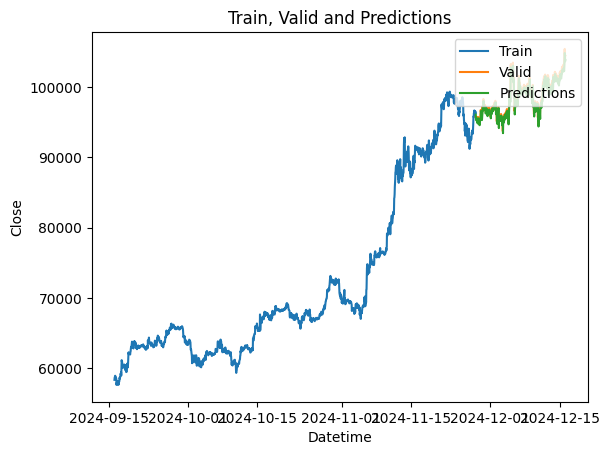

In [59]:
plt.title('Train, Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
 
plt.show()

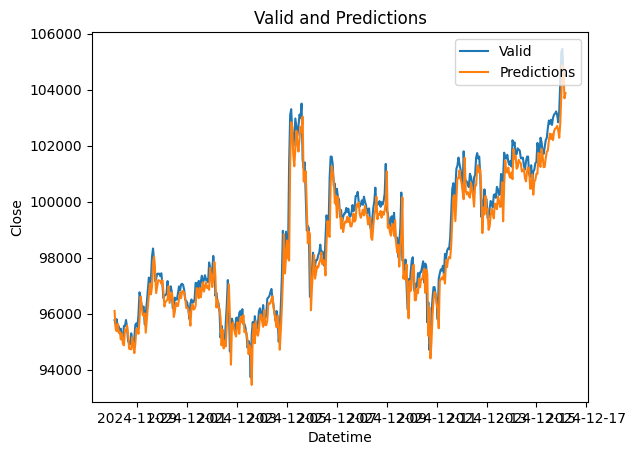

In [60]:
plt.title('Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Valid', 'Predictions'], loc='upper right')
 
plt.show()

In [61]:
closing_prices = scaled_data[len(scaled_data)-lookback:]
closing_prices = closing_prices.reshape(closing_prices.shape[0], 1)
print(closing_prices)

[[0.95101907]
 [0.95173186]
 [0.9533562 ]
 [0.95074766]
 [0.94522997]
 [0.9539911 ]
 [0.97500486]
 [0.99754905]
 [1.        ]
 [0.98109655]
 [0.98089128]
 [0.98007512]]


In [62]:
current_batch = closing_prices.reshape(1, lookback, 1)
print(current_batch)

[[[0.95101907]
  [0.95173186]
  [0.9533562 ]
  [0.95074766]
  [0.94522997]
  [0.9539911 ]
  [0.97500486]
  [0.99754905]
  [1.        ]
  [0.98109655]
  [0.98089128]
  [0.98007512]]]


In [63]:
predictions = []
time = int(24/2)
for i in range(time):  # Predicting 12 hours
    # Get the prediction (next hour)
    next_prediction = model.predict(current_batch)
    # print(scaler.inverse_transform(next_prediction))
    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    
    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    
    # Inverse transform the prediction to the original price scale
    predictions.append(scaler.inverse_transform(next_prediction)[0, 0])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[103888.805, 103221.36, 102595.375, 102045.65, 101568.32, 101148.695, 100770.516, 100419.54, 100085.04, 99761.7, 99448.586, 99144.06]


In [64]:
last_time = crypto_data_close.index[-1]
next_time = last_time + pd.Timedelta(hours=1)
prediction_times = pd.date_range(start=next_time, periods=len(predictions), freq='1h')
predict = pd.DataFrame(index=prediction_times, data=predictions, columns=['Close'])
print(predict)

                                   Close
2024-12-16 05:00:00+00:00  103888.804688
2024-12-16 06:00:00+00:00  103221.359375
2024-12-16 07:00:00+00:00  102595.375000
2024-12-16 08:00:00+00:00  102045.648438
2024-12-16 09:00:00+00:00  101568.320312
2024-12-16 10:00:00+00:00  101148.695312
2024-12-16 11:00:00+00:00  100770.515625
2024-12-16 12:00:00+00:00  100419.539062
2024-12-16 13:00:00+00:00  100085.039062
2024-12-16 14:00:00+00:00   99761.703125
2024-12-16 15:00:00+00:00   99448.585938
2024-12-16 16:00:00+00:00   99144.062500


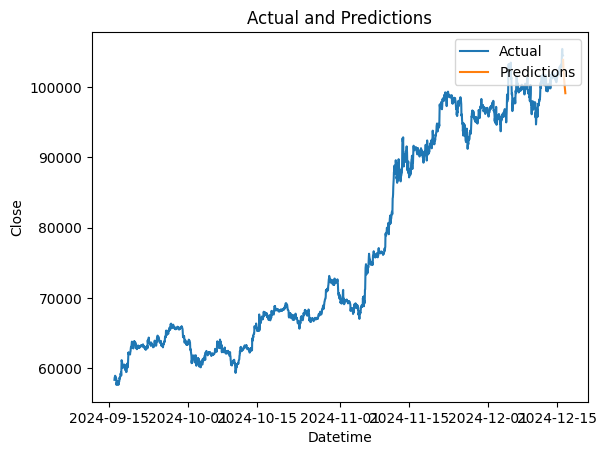

In [65]:
plt.title('Actual and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(crypto_data_close[['Close']])
plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()

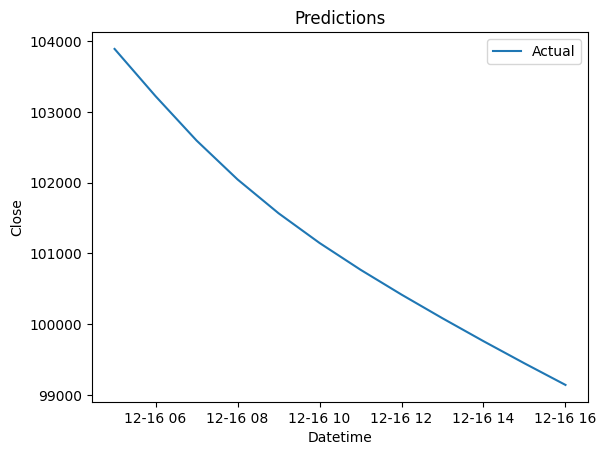

In [66]:
plt.title('Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()